<a href="https://colab.research.google.com/github/Souvik-karmakar/DivineAI_Python/blob/main/SVC_Bank_Note_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
bank_df = pd.read_csv("data_banknote_authentication.txt", names= ["variance", "skewness", "kurtosis", "Entropy", "class"])

In [3]:
bank_df.head()

,variance,skewness,kurtosis,Entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
bank_df.shape

(1372, 5)

In [5]:
bank_df.describe()

,variance,skewness,kurtosis,Entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


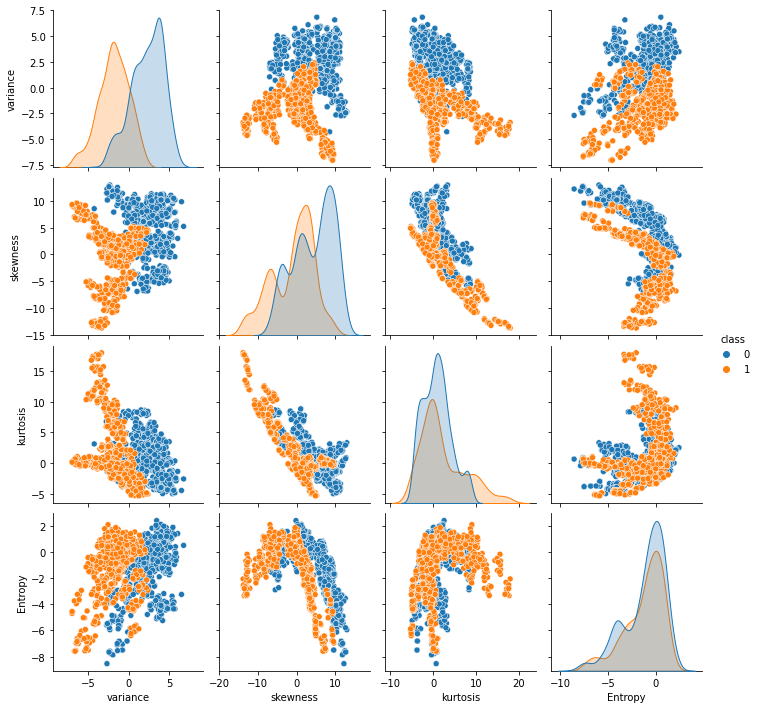

In [6]:
import seaborn as sns
sns.pairplot(bank_df, hue='class' , diag_kind= 'kde')

In [11]:
from scipy.stats import zscore

bank_df_attr = bank_df.loc[:, 'variance':'Entropy']  
bank_df_attr_z = bank_df_attr.apply(zscore)

# A simple function that takes as input a column, find's its median, identifies outliers, replaces outliers with median     
def replace(x):
    median, std = x.median(), x.std()  #Get the median and the standard deviation of every column
    outliers = (x - median).abs() > 2*std # Subtract median from every member of each column. Take absolute values > 2std
    x[outliers] = x.median()       
    return x

bank_df_corrected = bank_df_attr_z.apply(lambda x:x.transform(replace)) # transforming raw data using replace function
bank_df_treated = bank_df_corrected.join(pd.DataFrame(bank_df['class']))  # joining back the numeric and non-numeric columns

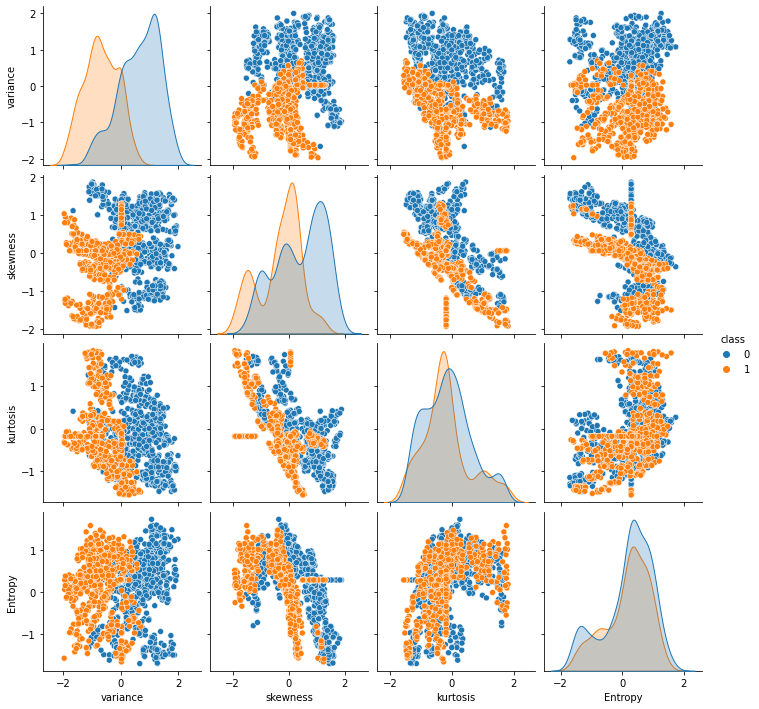

In [12]:
import seaborn as sns
sns.pairplot(bank_df_treated, hue = 'class', diag_kind = 'kde')

In [13]:
X = bank_df.drop('class', axis=1)  
y = bank_df['class'] 

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)  

In [16]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = svclassifier.predict(X_test)  

In [18]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[222   4]
 [  1 185]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       226
           1       0.98      0.99      0.99       186

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [19]:
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_pred = svclassifier.predict(X_test)  

In [21]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[161  65]
 [ 57 129]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       226
           1       0.66      0.69      0.68       186

    accuracy                           0.70       412
   macro avg       0.70      0.70      0.70       412
weighted avg       0.71      0.70      0.70       412



In [22]:
svclassifier = SVC(kernel='poly', degree=15) 
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=15, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_pred = svclassifier.predict(X_test)  

In [ ]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[221   0]
 [116  75]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       221
           1       1.00      0.39      0.56       191

    accuracy                           0.72       412
   macro avg       0.83      0.70      0.68       412
weighted avg       0.82      0.72      0.69       412



In [ ]:
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)  

SVC()

In [24]:
y_pred = svclassifier.predict(X_test)  

In [25]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[226   0]
 [125  61]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       226
           1       1.00      0.33      0.49       186

    accuracy                           0.70       412
   macro avg       0.82      0.66      0.64       412
weighted avg       0.80      0.70      0.65       412

